## color palettes

In [1]:
%load_ext lab_black

In [2]:
%matplotlib inline
from typing import Dict, List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgb
from colorsys import rgb_to_hls
from colorspacious import cspace_converter
import seaborn as sns
from ipywidgets import interact, fixed, IntSlider, FloatSlider, FloatLogSlider, Layout

In [3]:
# Basic example
# If as_cmap is True, returns matplotlib.colors.Colormap
#     from seaborn 0.11.0 (Sep. 2020)
# desat = desaturate
sns.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Functions

In [4]:
# color palettes
color_palettes = {
    "qualitative": {
        "middle": " ".join(
            [
                "deep muted pastel bright dark colorblind",  # seaborn original
                "tab10 tab20 tab20b tab20c",  # matplotlib default
                "Paired Accent Set1 Pastel1 Set2 Dark2 Pastel2 Set3",
            ]
        ),
    },
    "cyclic": {
        "middle": " ".join(
            ["hls husl", "hsv twilight twilight_shifted",]  # seaborn original
        ),
    },
    "sequential": {
        "darken": " ".join(
            [
                "Greys Reds Greens Blues Oranges Purples",  # 1 color
                "RdPu GnBu BuPu BuGn OrRd PuBu PuRd YlGn",  # 2 colors
                "PuBuGn YlGnBu YlOrBr YlOrRd",  # 3 colors
                "binary gist_yarg",  # binary
            ]
        ),
        "lighten": " ".join(["gray gist_gray bone pink",]),
    },
    "perceptual uniform": {
        "lighen": " ".join(
            ["rocket magma inferno plasma", "cividis viridis mako",]  # hot  # cool
        ),
        "darken": " ".join(["flare crest",]),
    },
    "well defined": {
        "lighen": " ".join(["cubehelix CMRmap gnuplot gnuplot2"]),  # colorful
    },
    "diverging": {
        "middle": " ".join(
            [
                "PiYG PRGn BrBG PuOr RdGy RdBu",  # 2 colors
                "RdYlBu RdYlGn",  # 3 colors
                "coolwarm bwr seismic",  # blue and red
                "Spectral rainbow turbo",  # colorful
            ]
        ),
    },
    "perceptual uniform diverging": {
        "middle": " ".join(["vlag icefire",]),  # seaborn original
    },
    "miscellaneous": {
        "lighten": " ".join(
            [
                "spring summer autumn winter",  # seasons
                "hot afmhot gist_heat copper",  # hot
                "brg nipy_spectral gist_ncar gist_rainbow",  # colorful
                "terrain gist_stern gist_earth ocean",  # nature color
            ]
        ),
        "darken": " ".join(["cool Wistia",]),
        "middle": " ".join(["flag prism",]),
    },
    # "jet" !!
}

In [5]:
def get_palettes(palette_category: str) -> List[str]:
    palettes = list()
    for palette_names in color_palettes[palette_category].values():
        palettes.extend(palette_names.split(" "))
    return palettes

In [6]:
def convert_to_cmap(palette: str) -> ListedColormap:
    cmap = sns.color_palette(palette=palette, as_cmap=True)
    if cmap.__class__.__name__ == "list":
        cmap = LinearSegmentedColormap.from_list(
            name=palette, N=len(cmap), colors=[to_rgb(x) for x in cmap]
        )
    return cmap

In [7]:
def list_color_palettes(palette_category: str) -> None:
    palettes = get_palettes(palette_category)
    fig, axes = plt.subplots(nrows=len(palettes), figsize=(6.4, len(palettes) * 0.4))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    if axes.__class__.__name__ != "ndarray":
        axes = np.array([axes])
    for ax, palette in zip(axes, palettes):
        cmap = convert_to_cmap(palette=palette)
        ax.imshow(gradient, aspect="auto", cmap=cmap)
        ax.set_axis_off()
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3] / 2.0
        fig.text(x_text, y_text, palette, va="center", ha="right", fontsize=14)
    plt.show()
    return

In [8]:
def draw_qualitative_cmap(cmap: ListedColormap, n_colors: int) -> None:
    assert n_colors.__class__.__name__ == "int"
    assert n_colors > 0
    fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
    ax.imshow(
        np.arange(n_colors).reshape(1, n_colors),
        cmap=cmap,
        interpolation="nearest",
        aspect="auto",
    )
    ax.set_xticks(np.arange(n_colors))
    ax.set_yticks([])
    ax.set_xticklabels([str(i) for i in range(n_colors)])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    plt.show()
    return

In [9]:
def draw_sequential_cmap(cmap: ListedColormap) -> None:
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(1, 1, figsize=(10, 1))
    ax.imshow(gradient, cmap=cmap, interpolation="nearest", aspect="auto")
    ax.set_axis_off()
    plt.show()
    return

In [10]:
def draw_lightness_cmap(cmap: ListedColormap) -> None:
    x_ = np.linspace(0.0, 1.0, 100)
    rgb = cmap(x_)[np.newaxis, :, :3]
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    y_ = lab[0, :, 0]
    c_ = x_
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
    ax.scatter(x_, y_, c=c_, cmap=cmap, s=100, linewidths=0.0)
    ax.set_ylim(0.0, 100.0)
    ax.set_ylabel("Lightness")
    ax.set_xticks([])
    plt.show()
    return

In [11]:
def draw_huewheel_cmap(cmap: ListedColormap) -> None:
    x_ = np.linspace(0.0, 1.0, 100)
    rgb = cmap(x_)[np.newaxis, :, :3]
    hls = np.array([rgb_to_hls(*x) for x in rgb[0]])
    h_ = hls[:, 0] * 2 * np.pi
    s_ = hls[:, 2]
    c_ = x_
    ax = plt.subplot(111, projection="polar")
    ax.scatter(h_, s_, c=c_, cmap=cmap, s=100, linewidths=0.0)
    ax.set_rlim([0.0, 1.05])
    ax.set_rgrids([])
    tickpos = np.linspace(0, 2 * np.pi, 4, endpoint=False)
    ax.set_xticks(tickpos)
    plt.show()
    return

In [12]:
def draw_each_cmap(figure_type: str, cmap: ListedColormap, n_colors: int) -> None:
    if figure_type == "qualitative":
        draw_qualitative_cmap(cmap=cmap, n_colors=n_colors)
    elif figure_type == "sequential":
        draw_sequential_cmap(cmap=cmap)
    elif figure_type == "lightness":
        draw_lightness_cmap(cmap=cmap)
    elif figure_type == "hue wheel":
        draw_huewheel_cmap(cmap=cmap)
    else:
        raise ValueError("invalid figure_type")
    return

In [13]:
def draw_each_color_palette(
    figure_type: str, palette: str, reverse: bool, n_colors: int, desaturation: float
) -> None:
    if reverse:
        palette += "_r"
    if figure_type == "qualitative":
        pal = sns.color_palette(
            palette=palette, n_colors=n_colors, desat=desaturation, as_cmap=False
        )
        cmap = ListedColormap(list(pal))
    else:
        cmap = convert_to_cmap(palette=palette)
    draw_each_cmap(figure_type=figure_type, cmap=cmap, n_colors=n_colors)
    return

In [14]:
def draw_cyclic_color_palette(
    figure_type: str,
    palette: str,
    n_colors: int,
    first_hue: float,
    lightness: float,
    saturation: float,
) -> None:
    assert palette in ["hls", "husl"]
    cmap = eval(f"sns.{palette}_palette")(
        n_colors=n_colors, h=first_hue, l=lightness, s=saturation, as_cmap=True
    )
    draw_each_cmap(figure_type=figure_type, cmap=cmap, n_colors=n_colors)
    return

In [15]:
def draw_sequential_color_palette(
    figure_type: str,
    palette: str,
    reverse: bool,
    n_colors: int,
    red: float,
    green: float,
    blue: float,
):
    assert palette in ["light", "dark"]
    cmap = eval(f"sns.{palette}_palette")(
        color=(red, green, blue),
        n_colors=n_colors,
        reverse=reverse,
        input="rgb",
        as_cmap=True,
    )
    draw_each_cmap(figure_type=figure_type, cmap=cmap, n_colors=n_colors)
    return

In [16]:
def draw_cubehelix_color_palette(
    figure_type: str,
    reverse: bool,
    n_colors: int,
    start_hue: float,
    n_rotations: float,
    gamma: float,
    hue: float,
    lightest: float,
    darkest: float,
) -> None:
    cmap = sns.cubehelix_palette(
        n_colors=n_colors,
        start=start_hue,
        rot=n_rotations,
        gamma=gamma,
        hue=hue,
        light=lightest,
        dark=darkest,
        reverse=reverse,
        as_cmap=True,
    )
    draw_each_cmap(figure_type=figure_type, cmap=cmap, n_colors=n_colors)
    return

In [17]:
def draw_diverging_color_palette(
    figure_type: str,
    center: str,
    n_colors: int,
    negative_hue: float,
    positive_hue: float,
    lightness: float,
    saturation: float,
    intermediates: int,
) -> None:
    cmap = sns.diverging_palette(
        h_neg=negative_hue,
        h_pos=positive_hue,
        s=saturation,
        l=lightness,
        center=center,
        sep=intermediates,
        n=n_colors,
        as_cmap=True,
    )
    draw_each_cmap(figure_type=figure_type, cmap=cmap, n_colors=n_colors)
    return

In [18]:
def draw_jet_color_palette(figure_type: str, reverse: bool, n_colors: int) -> None:
    cname = "jet"
    if reverse:
        cname += "_r"
    cmap = cm.get_cmap(cname)
    draw_each_cmap(figure_type=figure_type, cmap=cmap, n_colors=n_colors)
    return

In [19]:
widget_style = {"description_width": "initial"}
slide_layout = Layout(width="65%")

In [20]:
def int_slider(v: Tuple[int], desc: str) -> IntSlider:
    minv, maxv, stepv, valuev = v
    return IntSlider(
        min=minv,
        max=maxv,
        step=stepv,
        value=valuev,
        layout=slide_layout,
        style=widget_style,
        description=desc,
    )

In [21]:
def float_slider(v: Tuple[float], desc: str) -> FloatSlider:
    minv, maxv, stepv, valuev = v
    return FloatSlider(
        min=minv,
        max=maxv,
        step=stepv,
        value=valuev,
        layout=slide_layout,
        style=widget_style,
        description=desc,
    )

### Qualitative Color Palettes
Use for representing categorical data

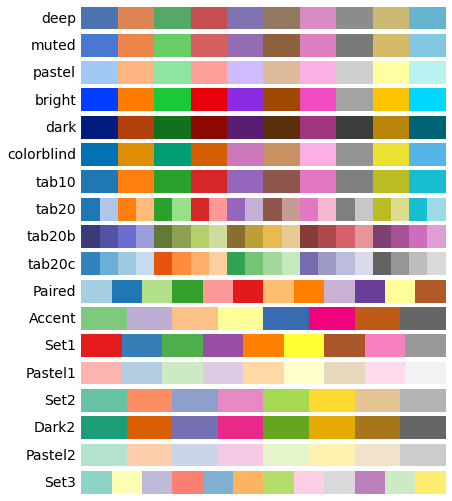

In [22]:
list_color_palettes(palette_category="qualitative")

### Check Qualitative Color Palette interactively

In [23]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "lightness", "hue wheel"],
    palette=get_palettes(palette_category="qualitative"),
    reverse=fixed(False),
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'lightness', 'hue wheel'), v…

### Cyclic Color Palettes

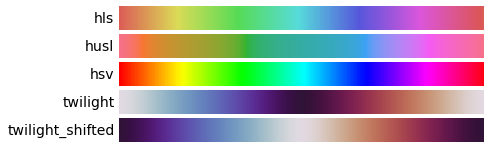

In [24]:
list_color_palettes(palette_category="cyclic")

### Check Cyclic Color Palette interactively

In [25]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=get_palettes(palette_category="cyclic"),
    reverse=fixed(False),
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Cusomize Cyclic Color Palette

In [26]:
_ = interact(
    draw_cyclic_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=["hls", "husl"],
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    first_hue=float_slider(v=(0.00, 1.0, 0.01, 0.01), desc="first_hue"),
    lightness=float_slider(v=(0.0, 1.0, 0.01, 0.6), desc="lightness"),
    saturation=float_slider(v=(0.0, 1.0, 0.01, 0.65), desc="saturation"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Sequential Color Palettes

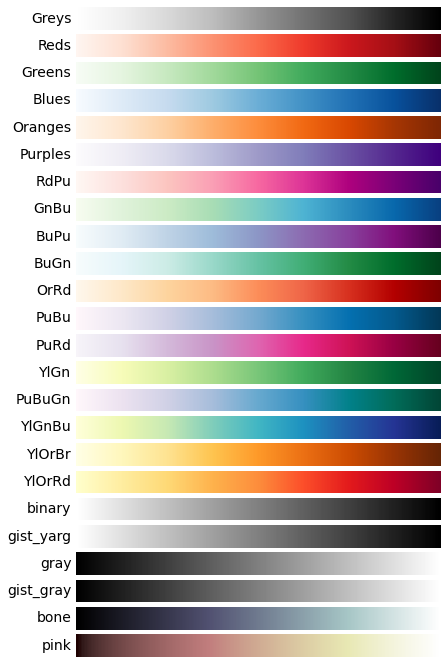

In [27]:
list_color_palettes(palette_category="sequential")

### Check Sequential Color Palette interactively

In [28]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=get_palettes(palette_category="sequential"),
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Cusomize Seqential Color Palette

In [29]:
_ = interact(
    draw_sequential_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=["light", "dark"],
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    red=float_slider(v=(0.0, 1.0, 0.01, 0.0), desc="red"),
    green=float_slider(v=(0.0, 1.0, 0.01, 0.0), desc="green"),
    blue=float_slider(v=(0.0, 1.0, 0.01, 0.0), desc="blue"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Perceptually Uniform Color Palettes

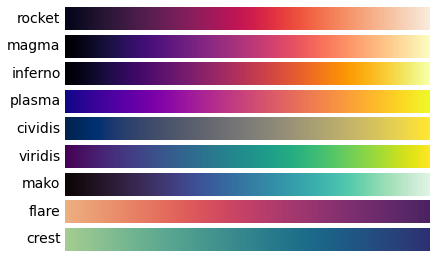

In [30]:
list_color_palettes(palette_category="perceptual uniform")

### Check Perceptual Uniform Color Palette interactively

In [31]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=get_palettes("perceptual uniform"),
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Well Defined Color Palettes

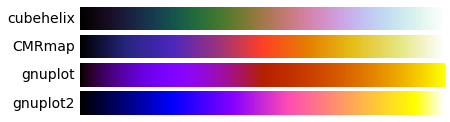

In [32]:
list_color_palettes(palette_category="well defined")

### Check Well Defined Color Palette interactively

In [33]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=get_palettes(palette_category="well defined"),
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Customize Cubehelix Color Palette

In [34]:
_ = interact(
    draw_cubehelix_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    start_hue=float_slider(v=(0.0, 3.0, 0.01, 0.0), desc="start_hue"),
    n_rotations=float_slider(v=(1.0, 3.0, 0.01, 0.4), desc="n_rotations"),
    gamma=float_slider(v=(0.0, 3.0, 0.1, 1.0), desc="gamma"),
    hue=float_slider(v=(0.0, 1.0, 0.01, 0.8), desc="hue"),
    lightest=float_slider(v=(0.0, 1.0, 0.01, 0.85), desc="lightest"),
    darkest=float_slider(v=(0.0, 1.0, 0.01, 0.15), desc="darkest"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Diverging Color Palettes

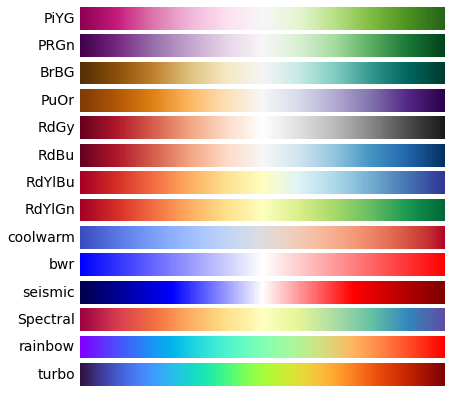

In [35]:
list_color_palettes(palette_category="diverging")

### Check Diverging Color Palette interactively

In [36]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=get_palettes(palette_category="diverging"),
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Customize Diverging Color Palette

In [37]:
_ = interact(
    draw_diverging_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    center=["light", "dark"],
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    negative_hue=float_slider(v=(0.0, 359.0, 1.0, 220.0), desc="negative hue"),
    positive_hue=float_slider(v=(0.0, 359.0, 1.0, 10.0), desc="positive hue"),
    lightness=float_slider(v=(0.0, 99.0, 1.0, 50.0), desc="lightness"),
    saturation=float_slider(v=(0.0, 99.0, 1.0, 74.0), desc="saturation"),
    intermediates=int_slider(v=(1, 50, 1, 10), desc="intermediates"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Perceptual Uniform Diverging Color Palettes

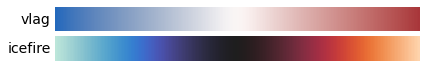

In [38]:
list_color_palettes(palette_category="perceptual uniform diverging")

### Check Perceptual Uniform Diverging Color Palette interactively

In [39]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=get_palettes(palette_category="perceptual uniform diverging"),
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Miscellaneous Color Pallets

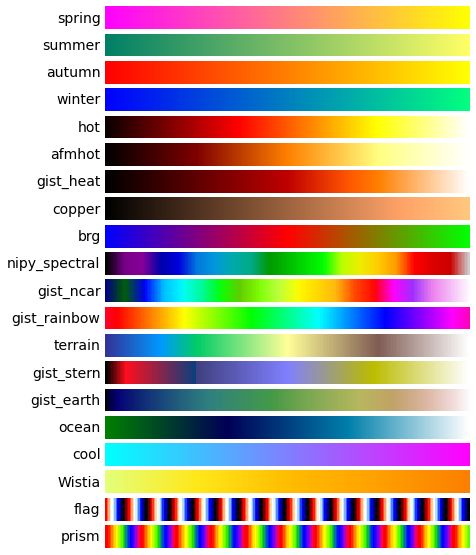

In [40]:
list_color_palettes(palette_category="miscellaneous")

### Check Miscellaneous Color Palette interactively

In [41]:
_ = interact(
    draw_each_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    palette=get_palettes(palette_category="miscellaneous"),
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
    desaturation=float_slider(v=(0.0, 1.0, 0.01, 1.0), desc="desaturation (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Exception: Jet Colormap

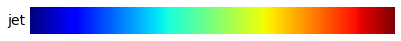

In [42]:
def list_jet() -> None:
    fig, ax = plt.subplots(nrows=1, figsize=(6.4, 0.4))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    cmap = cm.get_cmap("jet")
    ax.imshow(gradient, aspect="auto", cmap=cmap)
    ax.set_axis_off()
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3] / 2.0
    fig.text(x_text, y_text, "jet", va="center", ha="right", fontsize=14)
    plt.show()
    return


list_jet()

In [43]:
_ = interact(
    draw_jet_color_palette,
    figure_type=["qualitative", "sequential", "lightness", "hue wheel"],
    reverse=False,
    n_colors=int_slider(v=(1, 20, 1, 10), desc="n_colors (*)"),
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

### Lightness of Color palettes

In [44]:
def draw_lightness():
    x = np.linspace(0.0, 1.0, 100)
    NPAL = {
        "qualitative": 6,
        "cyclic": 5,
        "sequential": 6,
        "perceptual uniform": 4,
        "diverging": 4,
        "perceptual uniform diverging": 4,
        "well defined": 4,
        "miscellaneous": 4,
    }
    _DC = {}
    for palette_category, palette_group in color_palettes.items():
        npal = NPAL.get(palette_category, 6)
        for palette_type, palette_names in palette_group.items():
            palette_list = palette_names.split(" ")
            nsubplots = int(np.ceil(len(palette_list) / npal))
            fig, axes = plt.subplots(
                nrows=nsubplots, squeeze=False, figsize=(8, 2.6 * nsubplots)
            )
            for i, ax in enumerate(axes.flat):
                locs = []  # locations for text labels
                for j, palette in enumerate(palette_list[i * npal : (i + 1) * npal]):
                    cmap = convert_to_cmap(palette=palette)
                    rgb = cmap(x)[np.newaxis, :, :3]
                    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
                    if palette_type == "darken":
                        # These colormaps all start at high lightness but we want them
                        # reversed to look nice in the plot, so reverse the order.
                        y_ = lab[0, ::-1, 0]
                        c_ = x[::-1]
                    else:
                        y_ = lab[0, :, 0]
                        c_ = x
                    # cmaps horizontal spacing
                    dc = _DC.get(palette_category, 1.4)
                    ax.scatter(x + j * dc, y_, c=c_, cmap=cmap, s=100, linewidths=0.0)
                    if palette_type == "middle":
                        locs.append(x[int(x.size / 2.0)] + j * dc)
                    else:
                        locs.append(x[-1] + j * dc)
                ax.set_xlim(0, dc * npal)
                ax.set_ylim(0, 100)
                ax.xaxis.set_ticks_position("top")
                tick = ticker.FixedLocator(locs)
                ax.xaxis.set_major_locator(tick)
                formatter = ticker.FixedFormatter(
                    palette_list[i * npal : (i + 1) * npal]
                )
                ax.xaxis.set_major_formatter(formatter)
                ax.xaxis.set_tick_params(rotation=50)
                ax.set_ylabel("Lightness $L^*$", fontsize=12)
            if palette_type == "middle":
                palette_title = f"{palette_category} color palettes"
            else:
                palette_title = f"{palette_category} ({palette_type}) color palettes"
            axes.flat[0].set_title(palette_title, fontsize=16)
            fig.tight_layout(h_pad=0.0, pad=1.5)
            plt.show()

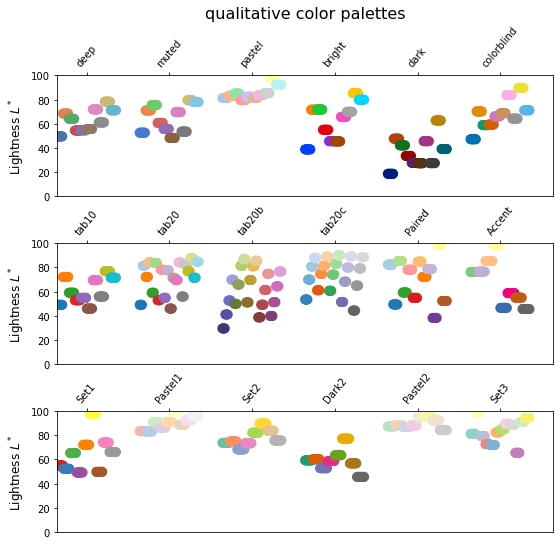

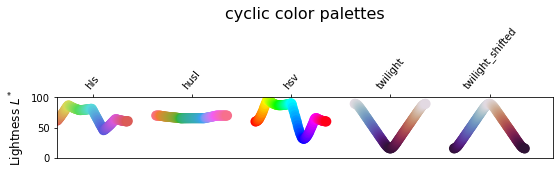

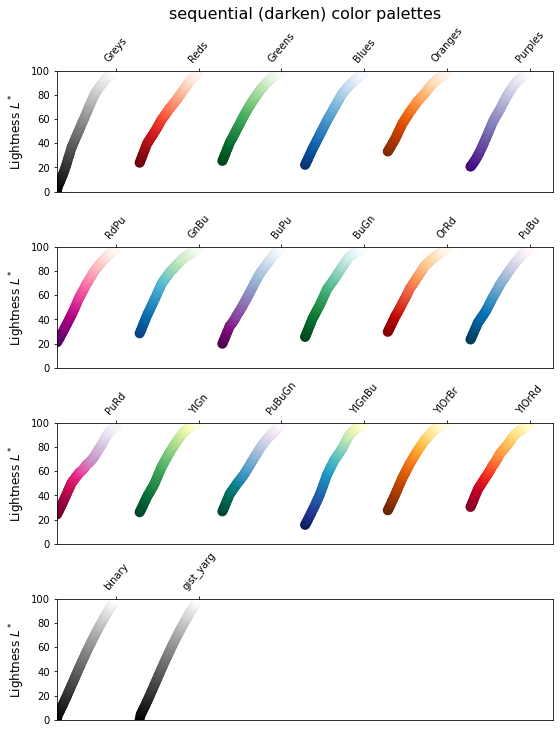

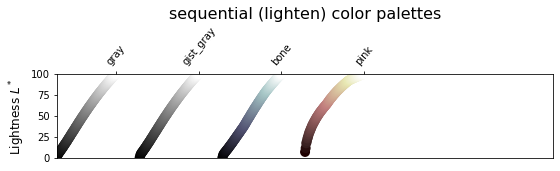

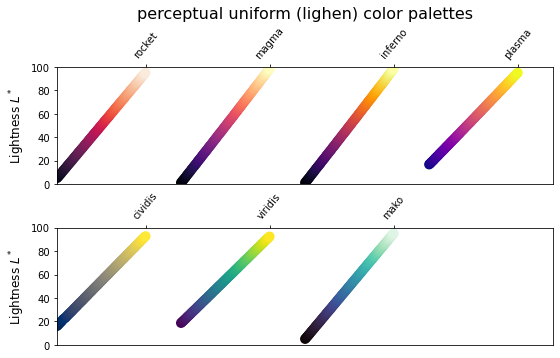

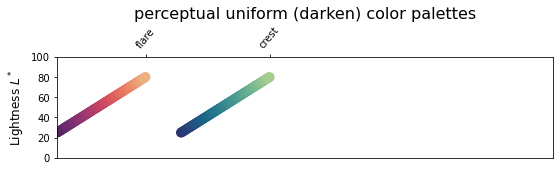

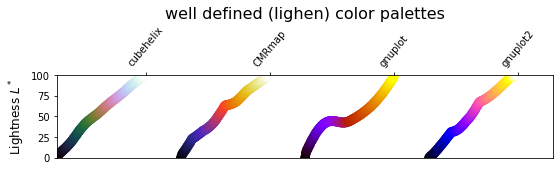

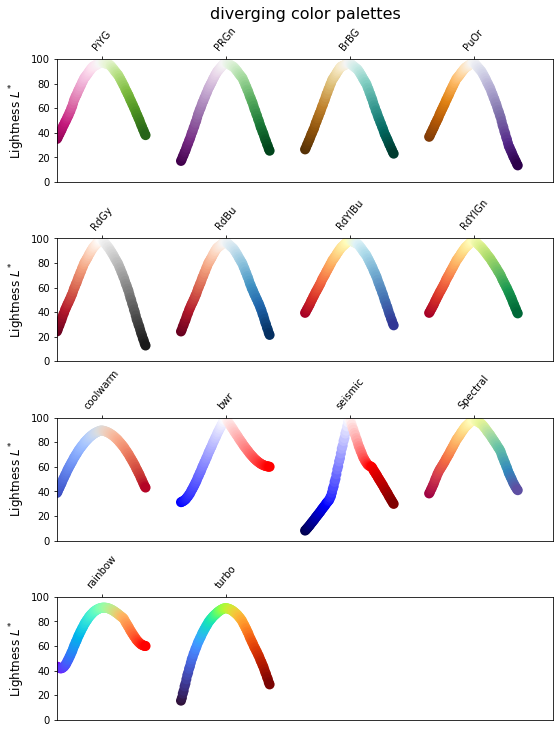

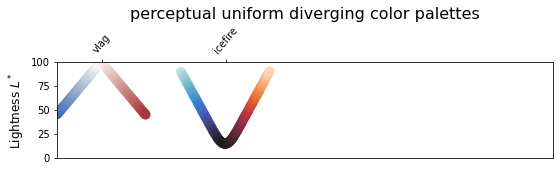

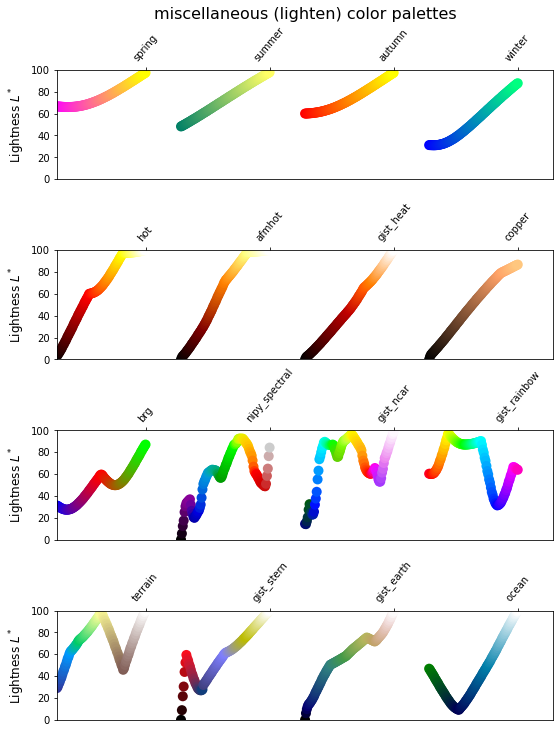

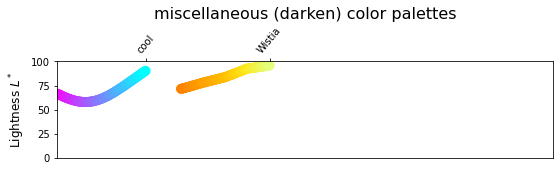

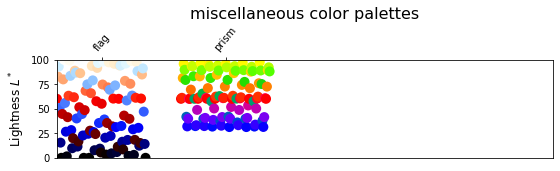

In [45]:
draw_lightness()

## Name of Colors
### Functions

In [46]:
from __future__ import division
from matplotlib import colors as mcolors


def draw_colornames(colors: Dict, jp: bool = False) -> None:
    # Sort colors by hue, saturation, value and name.
    by_hsv = sorted(
        (tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
        for name, color in colors.items()
    )
    sorted_names = [name for hsv, name in by_hsv]
    n = len(sorted_names)
    ncols = 4
    nrows = n // ncols + 1
    if jp:
        sns.set(font=["Noto Sans CJK JP"])
    fig, ax = plt.subplots(figsize=(10, 0.2 * nrows))
    # Get height and width
    X, Y = fig.get_dpi() * fig.get_size_inches()
    h = Y / (nrows + 1)
    w = X / ncols
    for i, name in enumerate(sorted_names):
        col = i % ncols
        row = i // ncols
        y = Y - (row * h) - h
        xi_line = w * (col + 0.05)
        xf_line = w * (col + 0.25)
        xi_text = w * (col + 0.3)
        ax.text(
            xi_text,
            y,
            name,
            fontsize=(h * 0.8),
            horizontalalignment="left",
            verticalalignment="center",
        )
        ax.hlines(
            y + h * 0.1, xi_line, xf_line, color=colors[name], linewidth=(h * 0.6)
        )
    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_axis_off()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0)
    plt.show()
    if jp:
        sns.set()
    return

In [47]:
from seaborn.palettes import _ColorPalette


def list_one_palette(name: str, pal: _ColorPalette) -> None:
    fig, ax = plt.subplots(nrows=1, figsize=(6.4, 0.4))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    cmap = ListedColormap(list(pal))
    ax.imshow(gradient, aspect="auto", cmap=cmap)
    ax.set_axis_off()
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3] / 2.0
    fig.text(x_text, y_text, name, va="center", ha="right", fontsize=14)
    plt.show()
    return

In [48]:
def draw_one_color_palette(figure_type: str, pal: _ColorPalette, n_colors: int) -> None:
    cmap = ListedColormap(list(pal))
    draw_each_cmap(figure_type=figure_type, cmap=cmap, n_colors=n_colors)
    return

In [49]:
def get_japanese_colors() -> None:
    import requests
    from bs4 import BeautifulSoup
    import simplejson as json

    r = requests.get("https://www.colordic.org/w")
    soup = BeautifulSoup(r.text, "html.parser")
    colortable = soup.find_all("table", class_="colortable")[0]
    colordata = colortable.find_all("td")
    jpcolors = dict()
    for cd in colordata:
        cinfo = cd.a.get("title").split()
        jpcolors[cinfo[0]] = cinfo[2].upper()
    with open("jpcolors.py", "wt") as wf:
        wf.write("jpcolors = {\n")
        for k, v in jpcolors.items():
            wf.write(f'    "{k}": "{v}",\n')
        wf.write("}\n")
    return

In [50]:
def jpcolor_palette(colors: List[str], as_cmap: bool = False):
    palette = [jpcolors[name] for name in colors]
    return sns.color_palette(palette, len(palette))

### Colors defined by Matplotlib

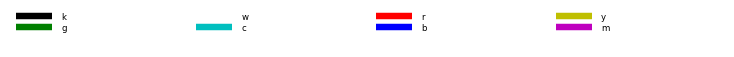

In [51]:
draw_colornames(colors=mcolors.BASE_COLORS)

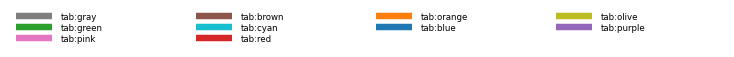

In [52]:
draw_colornames(colors=mcolors.TABLEAU_COLORS)

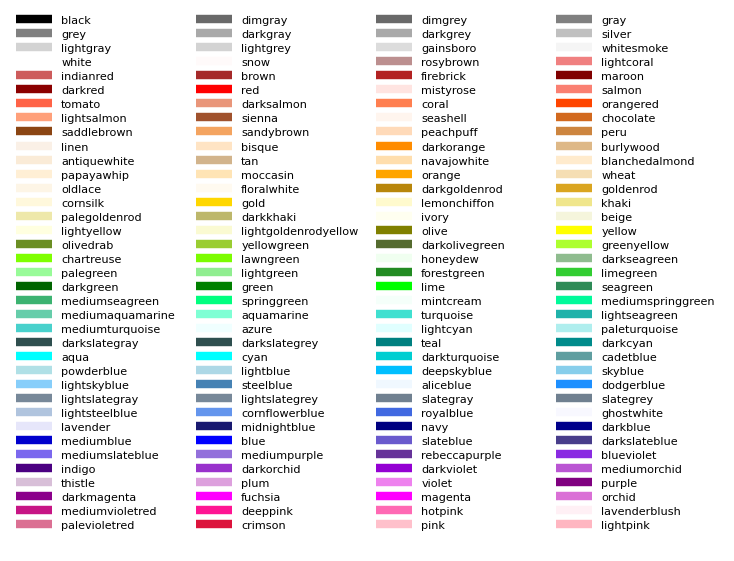

In [53]:
draw_colornames(colors=mcolors.CSS4_COLORS)

### Colors difined by Seaborn

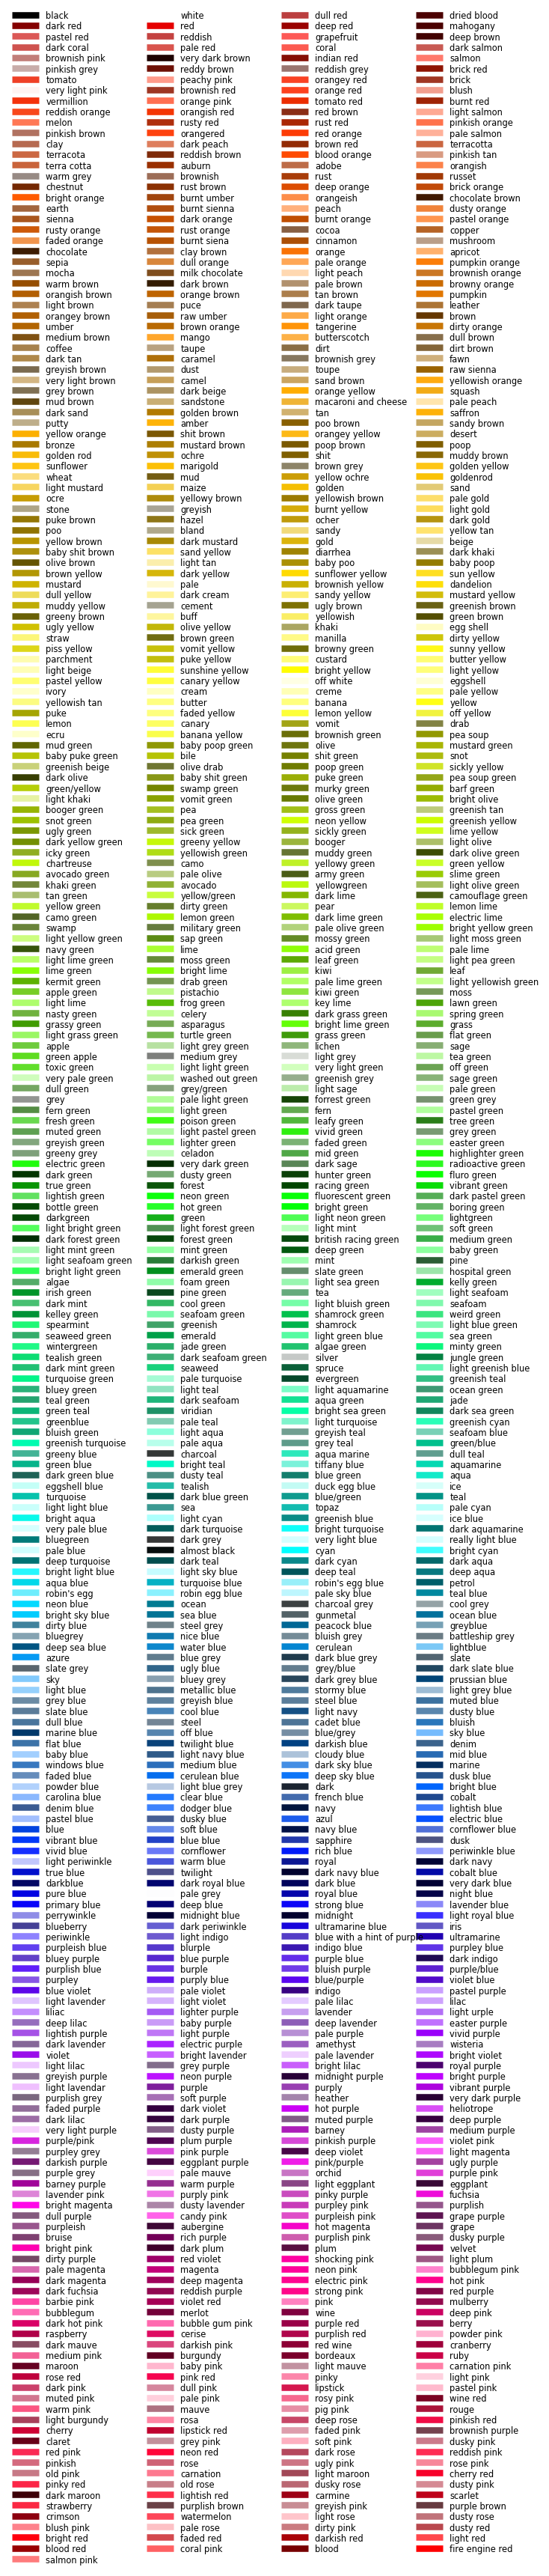

In [54]:
from seaborn.colors import xkcd_rgb

draw_colornames(colors=xkcd_rgb)

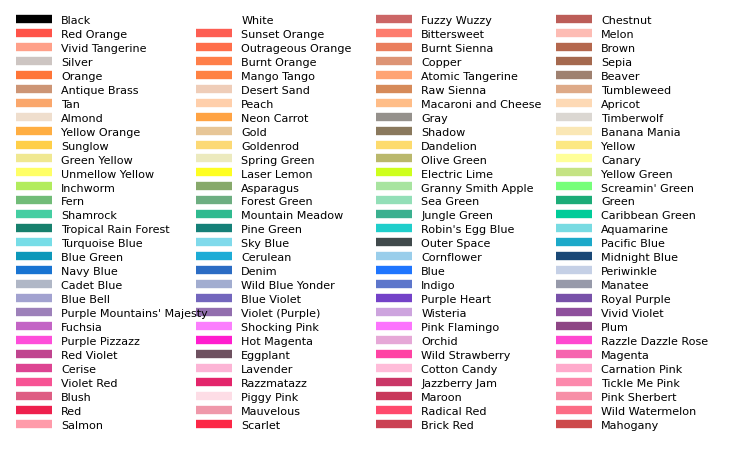

In [55]:
from seaborn.colors import crayons

draw_colornames(colors=crayons)

## Customize Qalitative Color Palette
### Qualitative Color Palette proposed by Tableau

In [56]:
tableau_palette = sns.color_palette(list(mcolors.TABLEAU_COLORS.values()))

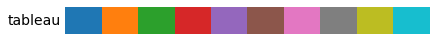

In [57]:
list_one_palette(name="tableau", pal=tableau_palette)

In [58]:
_ = interact(
    draw_one_color_palette,
    figure_type=["sequential", "lightness", "hue wheel"],
    pal=fixed(tableau_palette),
    n_colors=fixed(10),
)

interactive(children=(Dropdown(description='figure_type', options=('sequential', 'lightness', 'hue wheel'), va…